## UN Assignment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

## 5. How many rows and columns are in gdp_df? What are the data types of each column?

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


Answer: 8219 rows & 4 columns

## 6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita

In [9]:
gdp_df=gdp_df.drop(columns=['Value Footnotes'])

In [10]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [11]:
gdp_df=gdp_df.rename(columns= {
    'Country or Area':'Country',
    'Year':'Year',
    'Value':'GDP_Per_Capita'})
    

In [12]:
gdp_df.rename(columns= {
    'Country or Area':'Country',
    'Year':'Year',
    'Value':'GDP_Per_Capita'})

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


## 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?


 

In [14]:
countries = gdp_df.groupby('Country')['Year'].count().reset_index()

In [15]:
countries.max()

Country    Zimbabwe
Year             34
dtype: object

In [16]:
countries[countries['Year']==34].count()

Country    228
Year       228
dtype: int64

In [17]:
countries[countries['Year']<34].count()

Country    19
Year       19
dtype: int64

In [18]:
countries_missing_data=countries[countries['Year']<34]

In [19]:
countries_missing_data.info

<bound method DataFrame.info of                        Country  Year
0                  Afghanistan    24
23                      Bhutan    33
37              Cayman Islands    18
48                    CuraÃ§ao    24
54                    Djibouti    11
73               Faroe Islands    16
83                   Greenland    32
115                     Kosovo    16
125                    Lebanon    33
152                 Montenegro    27
188                 San Marino    26
191                     Serbia    29
195  Sint Maarten (Dutch part)    15
200                    Somalia    33
216       Syrian Arab Republic    33
225                      Tonga    33
229   Turks and Caicos Islands    13
242             Virgin Islands    21
243         West Bank and Gaza    30>

## 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [21]:
gdp_2020=gdp_df[gdp_df['Year']==2020]

(array([111.,  59.,  23.,  23.,  15.,   9.,   3.,   0.,   3.,   1.]),
 array([   833.92025746,  13576.18426579,  26318.44827412,  39060.71228245,
         51802.97629078,  64545.24029911,  77287.50430744,  90029.76831577,
        102772.0323241 , 115514.29633243, 128256.56034076]),
 <BarContainer object of 10 artists>)

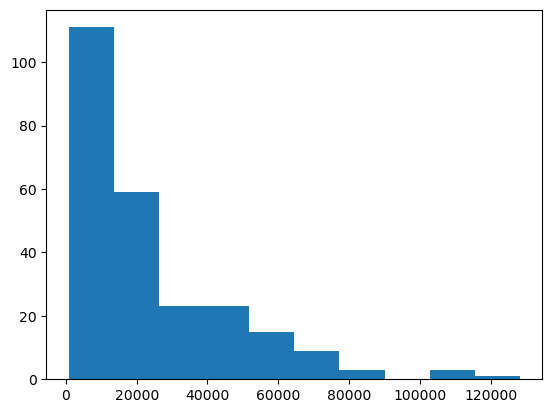

In [22]:
# Histogram plot
plt.hist(gdp_2020['GDP_Per_Capita'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1cf1f6ac1a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cf1f71aa80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cf1f6c4cb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cf1f71b020>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cf1f71b290>],
 'means': []}

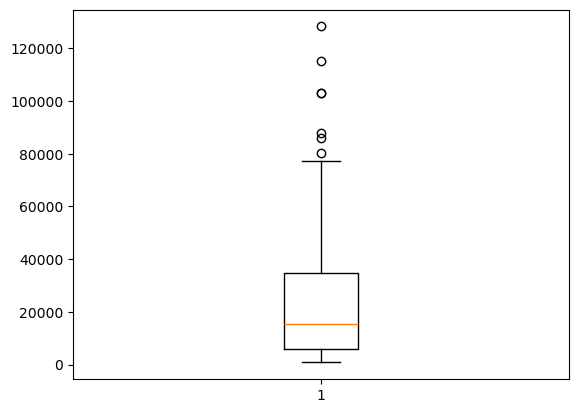

In [23]:
## Box plot
plt.boxplot(gdp_2020['GDP_Per_Capita'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1cf1f6afa10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1cf1f61e4e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1cf1ff74290>,
 'cbars': <matplotlib.collections.LineCollection at 0x1cf1f696060>}

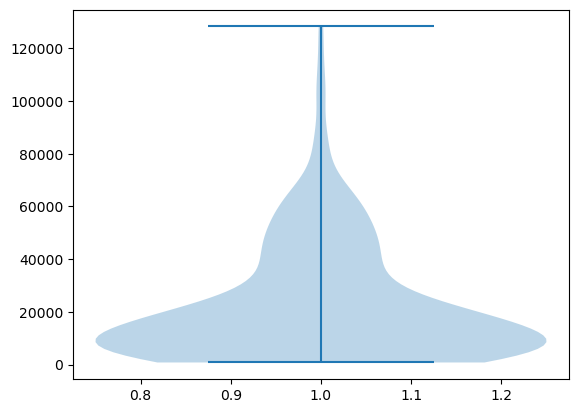

In [24]:
# Violin plot
plt.violinplot(gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

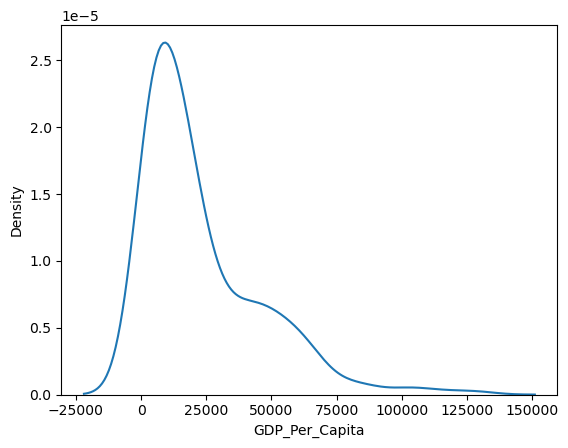

In [25]:
# Desnsity plot
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

## 9. What was the median GDP per capita value in 2020?

In [27]:
gdp_2020['GDP_Per_Capita'].median()

15309.23598817024

## 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

## A boxplot
## A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
## A scatterplot
## A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
## Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [29]:
decades = [1990,2000,2010,2020]

In [30]:
gdp_df[gdp_df['Year'].isin(decades)]

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


In [31]:
gdp_decades = gdp_df[gdp_df['Year'].isin(decades)]

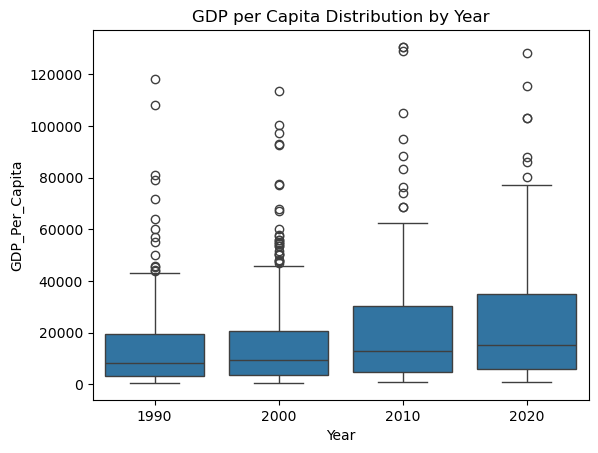

In [32]:
# Box Plot
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.title('GDP per Capita Distribution by Year')
plt.show()


C:\Users\macad\AppData\Local\Temp\ipykernel_34644\3578162915.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, estimator='mean', ci=None)


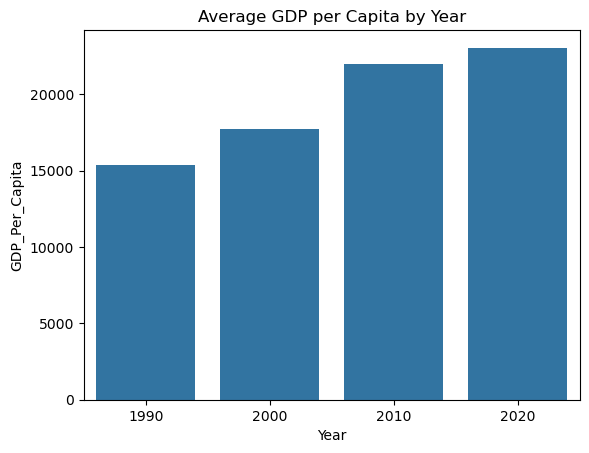

In [33]:
# Bar plot
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, estimator='mean', ci=None)
plt.title('Average GDP per Capita by Year')
plt.show()


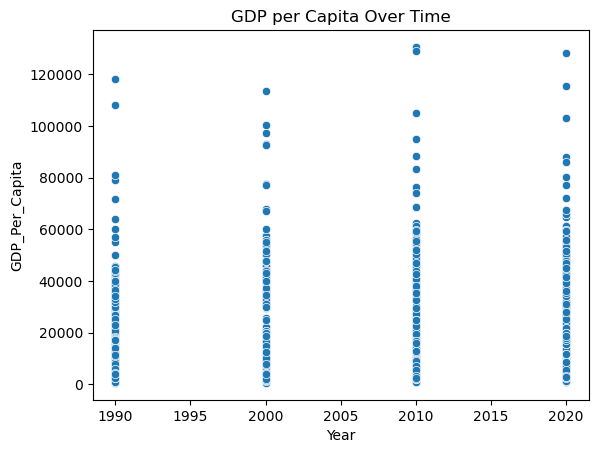

In [34]:
sns.scatterplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.title('GDP per Capita Over Time')
plt.show()


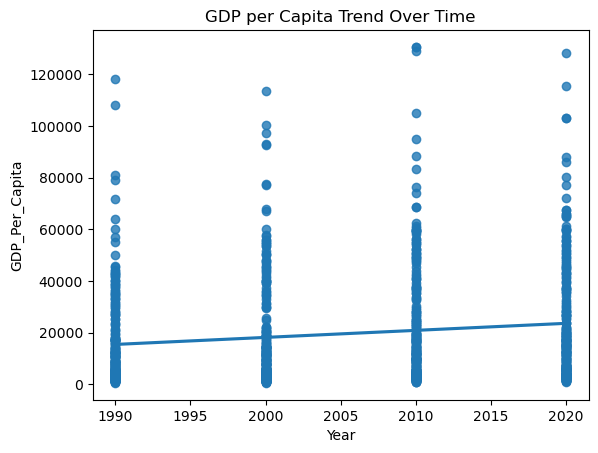

In [35]:
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, scatter=True, ci=None)
plt.title('GDP per Capita Trend Over Time')
plt.show()


## 11. Which country was the first to have a GDP per capita greater than $100,000?

In [37]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


In [38]:
high_gdp=gdp_df[gdp_df.GDP_Per_Capita > 100000]

In [97]:
sorted_gdp=high_gdp.sort_values(by = 'Year')
sorted_gdp.head()

,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057.042464
974,Brunei,1990,118163.683198
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
7825,United Arab Emirates,1992,101100.487512


## Answer: United Arab Emirates and Brunei!

## 12.Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [42]:
gdp_2020_sorted=gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = [False])
gdp_2020_sorted.head(1)

,Country,Year,GDP_Per_Capita
4426,Luxembourg,2020,128256.560341


## Answer: Luxemburgo 

## 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [100]:
lowest_gdp_2020=gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = [True])
lowest_gdp_2020.head()

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765


In [46]:
burundi_gdp=gdp_df[gdp_df['Country']=='Burundi']
burundi_gdp.head()

,Country,Year,GDP_Per_Capita
1043,Burundi,2023,828.861074
1044,Burundi,2022,829.387160
1045,Burundi,2021,836.665571
1046,Burundi,2020,833.920257
1047,Burundi,2019,855.732720


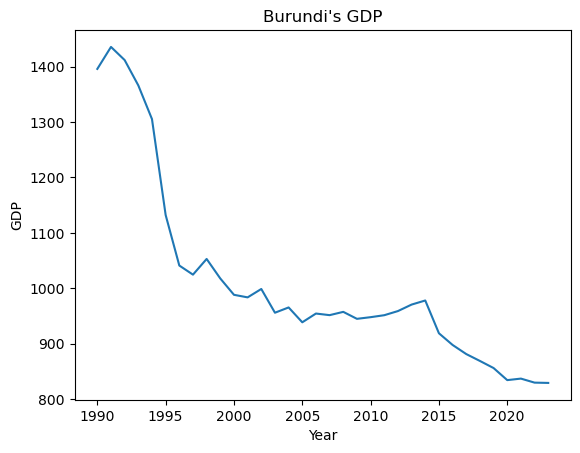

In [47]:

plt.plot(burundi_gdp.Year,burundi_gdp.GDP_Per_Capita)
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Burundi's GDP")
plt.show()


In [48]:
gdp_1990=gdp_df[gdp_df['Year']==1990]
gdp_1990.head()

,Country,Year,GDP_Per_Capita
57,Africa Eastern and Southern,1990,3386.854480
91,Africa Western and Central,1990,3299.401375
125,Albania,1990,5327.747458
159,Algeria,1990,11728.545729
193,Andorra,1990,50036.300776


In [49]:
gdp_1990_sorted=gdp_1990.sort_values(by = 'GDP_Per_Capita', ascending = [False])
gdp_1990_sorted.head()

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
4456,Luxembourg,1990,80947.492013
771,Bermuda,1990,79109.890650
6149,Qatar,1990,71584.446629


## 14.Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [51]:
internet_df= pd.read_csv('../data/internet_use.csv',on_bad_lines ='skip', skipfooter=299)

C:\Users\macad\AppData\Local\Temp\ipykernel_34644\1075222985.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  internet_df= pd.read_csv('../data/internet_use.csv',on_bad_lines ='skip', skipfooter=299)


## 15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct

In [53]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [54]:
internet_df=internet_df.drop(columns=['Value Footnotes'])
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [55]:
internet_df=internet_df.rename(columns= {
    'Country or Area':'Country',
    'Year':'Year',
    'Value':'internet_users_pct'})
internet_df.head()

,Country,Year,internet_users_pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


## 16. Look at the number of observations in this dataset per year. What do you notice?